# Assignment 2 (Implementation)

## Regression Algorithm Implementation

This file contains the implementation of the KNN algorithm for regression.

After implementing the algorithm, its performance is benchmarked w.r.t. the default Scikit learn implementation of the KNN regressor on two different datasets.


In [71]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Importing the datasets

In [72]:
life_exp_df = pd.read_csv("Data/Life Expectancy Data.csv")
life_exp_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [73]:
comp_hw_df = pd.read_csv("Data/machine.data", header=None)
comp_hw_df.columns = ['vendor_name', 'model', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

# dropping the model column even though it could be useful
comp_hw_df = comp_hw_df.drop(columns=['model'])

comp_hw_df

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,125,256,6000,256,16,128,198,199
1,amdahl,29,8000,32000,32,8,32,269,253
2,amdahl,29,8000,32000,32,8,32,220,253
3,amdahl,29,8000,32000,32,8,32,172,253
4,amdahl,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...
204,sperry,124,1000,8000,0,1,8,42,37
205,sperry,98,1000,8000,32,2,8,46,50
206,sratus,125,2000,8000,0,2,14,52,41
207,wang,480,512,8000,32,0,0,67,47


In [74]:
comp_hw_df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [75]:
comp_hw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   MYCT         209 non-null    int64 
 2   MMIN         209 non-null    int64 
 3   MMAX         209 non-null    int64 
 4   CACH         209 non-null    int64 
 5   CHMIN        209 non-null    int64 
 6   CHMAX        209 non-null    int64 
 7   PRP          209 non-null    int64 
 8   ERP          209 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 14.8+ KB


## KNN Implementation

In [76]:
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error


class CustomKNNRegressor(BaseEstimator):
    
    def __init__(self, k, distance_metric='euclidean', aggregation_fn = np.mean):
        self.k = k
        self.distance_metric = distance_metric
        self.euclidean_distance = lambda a, b: np.linalg.norm(a - b) # faster than iterating over the values and adding them up (uses optimizations offered by NP)
        self.manhattan_distance = lambda a, b : np.sum(np.abs(a - b))
        self.aggregation_fn = aggregation_fn
        
        
    def _get_distance_metric(self):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance
        elif self.distance_metric == 'manhattan':
            return self.manhattan_distance
        else:
            raise Exception("Invalid Distance metric")
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def _predict_one(self, row):
        distance_metric_fn = self._get_distance_metric()
        distances = self.X_train.apply(lambda x: distance_metric_fn(x, row), axis=1)
        # finding the indices of k smallest distances
        idx = np.argpartition(distances, self.k)[:self.k]
        return self.aggregation_fn(self.y_train.iloc[idx])
        
    
    def predict(self, X_test):
        return X_test.apply(lambda x : self._predict_one(x), axis=1)
        

### Evaluation and comparison


#### Computer Hardware Dataset 

Encoding the vendor name

In [77]:
comp_hw_df = pd.get_dummies(comp_hw_df)

In [78]:
X = comp_hw_df.drop(columns=['ERP'])
y = comp_hw_df.loc[:, 'ERP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


__Data preprocessing__

In [79]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.model_selection import cross_val_score
import time

In [80]:
comp_hw_df.isna().any()

MYCT                        False
MMIN                        False
MMAX                        False
CACH                        False
CHMIN                       False
CHMAX                       False
PRP                         False
ERP                         False
vendor_name_adviser         False
vendor_name_amdahl          False
vendor_name_apollo          False
vendor_name_basf            False
vendor_name_bti             False
vendor_name_burroughs       False
vendor_name_c.r.d           False
vendor_name_cambex          False
vendor_name_cdc             False
vendor_name_dec             False
vendor_name_dg              False
vendor_name_formation       False
vendor_name_four-phase      False
vendor_name_gould           False
vendor_name_harris          False
vendor_name_honeywell       False
vendor_name_hp              False
vendor_name_ibm             False
vendor_name_ipl             False
vendor_name_magnuson        False
vendor_name_microdata       False
vendor_name_na

Scaling only the columns that are not one hot encoded

In [81]:
ct = ColumnTransformer([
        ('transformer', StandardScaler(), ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP'])
    ], remainder='passthrough')

X_train = pd.DataFrame(ct.fit_transform(X_train))
X_test = pd.DataFrame(ct.fit_transform(X_test))

In [82]:
myKnn = CustomKNNRegressor(3)
knn_params = {
    'k': [2, 3, 5 , 7],
    'distance_metric': ['euclidean', 'manhattan']
    
}

knn_search = GridSearchCV(myKnn, knn_params, scoring='neg_mean_squared_error', n_jobs=-1, cv=2, error_score="raise")
knn_search_result = knn_search.fit(X_train, y_train)

In [83]:
knn_search_result.best_estimator_

CustomKNNRegressor(k=2)

In [84]:
knn_search_result.best_score_

-1412.9571917808219

**SK-learn KNN hyperparam. opt.**

In [85]:
sklearn_knn = KNeighborsRegressor()


In [86]:
knn_params = {
    'n_neighbors': [1, 2, 3, 4],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
    
}

knn_search = GridSearchCV(sklearn_knn, knn_params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
knn_search_result = knn_search.fit(X_train, y_train)

In [87]:
knn_search_result.best_params_

{'metric': 'euclidean', 'n_neighbors': 2}

In [88]:
knn_search_result.best_score_

-1289.9010919540228

**MLP regressor hyperparam. opt.**

In [89]:
mlp = MLPRegressor()

mlp_params = {
    'hidden_layer_sizes' : [ (100,), (200,), (300,) , (100, 100), (100,200) ],
    'learning_rate' : ['constant', 'adaptive'],
    'alpha' : [0.0001 , 0.0002]
}
mlp_search = RandomizedSearchCV(mlp, mlp_params, n_iter=15, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
mlp_result = mlp_search.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
mlp_result.best_estimator_

MLPRegressor(hidden_layer_sizes=(100, 200))

In [91]:
mlp_result.best_score_

-595.8746990586894

###### Training and evaluating different models

In [92]:
models = [ CustomKNNRegressor(2, distance_metric='euclidean'), 
          KNeighborsRegressor(2, metric='euclidean'), 
          MLPRegressor(hidden_layer_sizes=(100, 200), learning_rate='adaptive', max_iter=400) ]

evaluation_metrics = [ mean_squared_error, mean_absolute_error, median_absolute_error, lambda y_true,y_pred: np.sqrt(mean_squared_error(y_true,y_pred)) ]
evaluation_metrics_names = ['MSE', 'MAE', 'MedAE', 'RMSE']


validation = ['cv', 'holdout']

cols = ["algorithm", "val", 'MSE', 'MAE', 'MedAE', 'RMSE' , "fit_time(sec)", "predict_time(sec)", "total_time(sec)"]
results = pd.DataFrame(columns = cols)

for model in models:

    for validation_method in validation:
        print(model)

        if validation_method == 'holdout':
            # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # --------------------------------
            st = time.time()
            # ------------
            model.fit(X_train, y_train)   
            # ------------
            et = time.time()
            # --------------------------------

            y_pred = model.predict(X_test)
            et2 = time.time()
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            medae = median_absolute_error(y_test,y_pred)
            
            fit_time = et - st
            pred_time = et2 - et
            new_row = pd.DataFrame({
                "algorithm": str(model),
                "val": 'holdout',
                "MAE" : mean_absolute_error(y_test, y_pred),
                "MSE" : mean_squared_error(y_test, y_pred),
                "RMSE" : np.sqrt(mse),
                "MedAE" : median_absolute_error(y_test,y_pred),
                "fit_time(sec)": fit_time,
                "predict_time(sec)": pred_time,
                "total_time(sec)": et2-st
                
            }, index=[0])

            results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

        elif validation_method == 'cv':

            # --------------------------------
            st = time.time()
            # ------------
            scores_nmse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
            # ------------
            # --------------------------------
            scores_nmae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
            
            scores_nmedae = cross_val_score(model, X, y, cv=5, scoring='neg_median_absolute_error')
            # ------------
            et = time.time()
            # --------------------------------

            elapsed_time = et - st
            rmse_scores = np.sqrt(-scores_nmse)
            
            new_row = pd.DataFrame({
                "algorithm": str(model),
                "val": 'cv',
                "MSE": -scores_nmse.mean(),
                "MAE": -scores_nmae.mean(),
                "RMSE":rmse_scores.mean(),
                "MedAE": -scores_nmedae.mean(),
                "fit_time(sec)": None,
                "predict_time(sec)": None,
                "total_time(sec)": elapsed_time
            }, index=[0])

            results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)


CustomKNNRegressor(k=2)
CustomKNNRegressor(k=2)
KNeighborsRegressor(metric='euclidean', n_neighbors=2)
KNeighborsRegressor(metric='euclidean', n_neighbors=2)
MLPRegressor(hidden_layer_sizes=(100, 200), learning_rate='adaptive',
             max_iter=400)


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 200), learning_rate='adaptive',
             max_iter=400)


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [93]:
results_comp_hw = results
results_comp_hw.loc[:, 'algorithm'] = ['MLP', 'MLP', 'KNN-SKL', 'KNN-SKL', 'CustomKNN', 'CustomKNN']

In [94]:
results_comp_hw.round(3)

,algorithm,val,MAE,MSE,RMSE,MedAE,fit_time(sec),predict_time(sec),total_time(sec)
0,MLP,holdout,59.038,20165.931,142.007,12.002,5.259977,0.013009,5.273
1,MLP,cv,89.060,4302.409,57.592,25.833,None,None,33.717
2,KNN-SKL,holdout,72.508,33619.992,183.358,17.500,0.011998,0.016,0.028
3,KNN-SKL,cv,17.021,1733.870,37.317,4.250,None,None,0.522
4,CustomKNN,holdout,72.508,33619.992,183.358,17.500,0.0,8.884806,8.885
5,CustomKNN,cv,17.021,1733.870,37.317,4.250,None,None,105.164


In [26]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [27]:
#results.loc[results['val'] == 'holdout','MedAE']
# results.fillna(0, inplace=True)

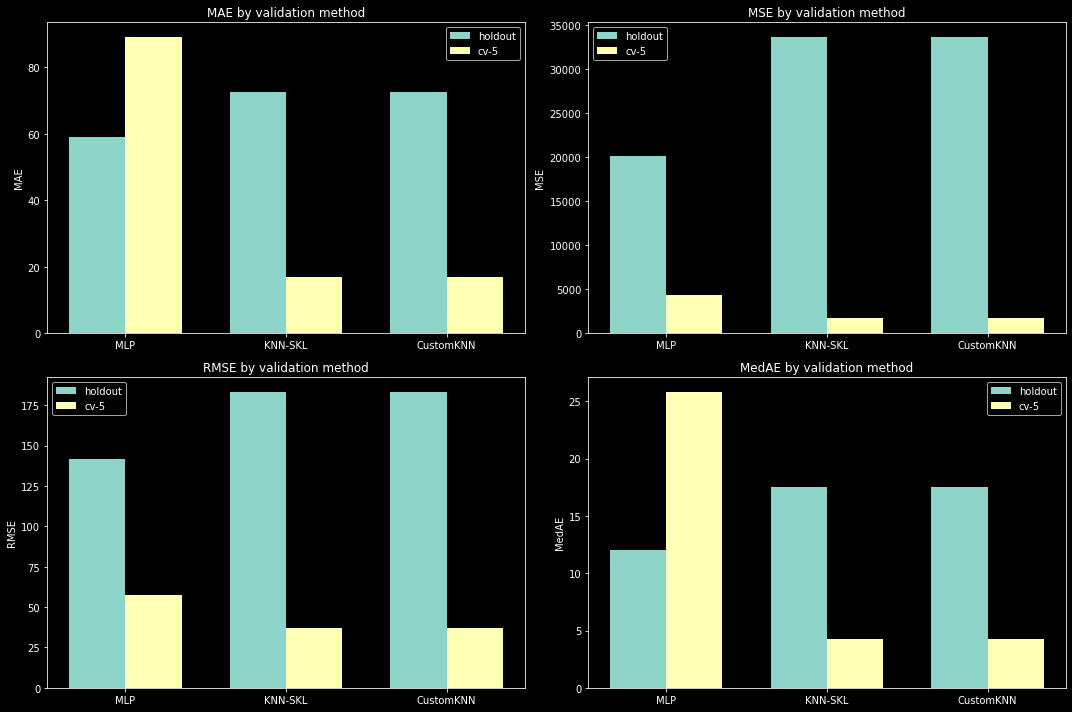

In [99]:


labels = ['MLP', 'KNN-SKL', 'CustomKNN']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars



fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, h=10)
for i in range(2):
    for j in range(2):
        
        metric_idx = 2 + i*2 + j
        metric_name = results.columns[metric_idx]

         
        rects1 = ax[i,j].bar(x - width/2, results_comp_hw.loc[results_comp_hw['val'] == 'holdout', metric_name], width, label='holdout')
        rects2 = ax[i,j].bar(x + width/2, results_comp_hw.loc[results_comp_hw['val'] == 'cv', metric_name], width, label='cv-5')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax[i,j].set_ylabel(metric_name)
        ax[i,j].set_title(f'{metric_name} by validation method')
        ax[i,j].set_xticks(x)
        ax[i,j].set_xticklabels(labels)
        ax[i,j].legend()

        fig.tight_layout()



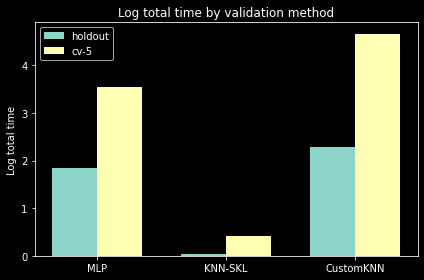

In [96]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, np.log(1+ results_comp_hw.loc[results_comp_hw['val'] == 'holdout', 'total_time(sec)']), width, label='holdout')
rects2 = ax.bar(x + width/2, np.log(1+ results_comp_hw.loc[results_comp_hw['val'] == 'cv', 'total_time(sec)']), width, label='cv-5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Log total time')
ax.set_title(f'Log total time by validation method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

## Life Expectancy dataset

In [30]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [31]:
life_exp_df.columns = [c.strip() for c in life_exp_df.columns] # remove trailing and preceding spaces from colnames

__Data preprocessing__

In [32]:
life_exp_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.model_selection import cross_val_score

import time

In [34]:
life_exp_df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Deleting rows where target is null.

In [35]:
life_exp_df.drop(life_exp_df[life_exp_df['Life expectancy'].isna()].index, inplace=True)

Percentage of rows with no null values.

In [36]:
np.round(1 - (life_exp_df.shape[0] - life_exp_df.dropna().shape[0])/life_exp_df.shape[0], 2)

0.56

Too low => Impute

In [37]:
X = life_exp_df.drop(columns=['Life expectancy'])

y = life_exp_df['Life expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_features = X_train.columns[X_train.dtypes == object]
numerical_features = X_train.columns[X_train.dtypes != object]

In [38]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train_cat = X_train[categorical_features].copy()
X_test_cat = X_test[categorical_features].copy()

X_train_num = X_train[numerical_features]
X_test_num = X_test[numerical_features]


X_train_num = pd.DataFrame(si.fit_transform(X_train_num), columns = X_train_num.columns, index=X_train_num.index) #only apply imputer to numeric columns
X_test_num = pd.DataFrame(si.fit_transform(X_test_num), columns = X_test_num.columns, index=X_test_num.index) #only apply imputer to numeric columns

#you could do something like one-hot-encoding of data_categorical here
X_train_cat = pd.get_dummies(X_train_cat)
X_test_cat = pd.get_dummies(X_test_cat)

#join the two masked dataframes back together
X_train = pd.concat([X_train_num, X_train_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)

# X_train_imp = pd.concat(X_train_imp, pd.DataFrame(si.fit_transform(X_train[numerical_features]), columns=numerical_features), axis )
# X_test_imp = pd.DataFrame(si.fit_transform(X_test[numerical_features]), columns=numerical_features)


In [39]:
#X_train_imp = X_train[categorical_features].copy()
#X_train.loc[X_train['Alcohol'].isna()]
#pd.DataFrame(si.fit_transform(X_train, featu ))
X_train.shape

(2049, 204)

Scaling only the columns that are not one hot encoded

In [40]:
ct = ColumnTransformer([
        ('transformer', StandardScaler(), numerical_features)
    ], remainder='passthrough')

X_train = pd.DataFrame(ct.fit_transform(X_train))
X_test = pd.DataFrame(ct.fit_transform(X_test))

In [41]:
# myKnn = CustomKNNRegressor(3)
# knn_params = {
#     'k': [2, 3],
#     'distance_metric': ['euclidean', 'manhattan']
    
# }

# knn_search = GridSearchCV(myKnn, knn_params, scoring='neg_mean_squared_error', n_jobs=-1, cv=2, error_score="raise")
# knn_search_result = knn_search.fit(X_train, y_train)

In [42]:
# knn_search_result.best_estimator_

In [43]:
# knn_search_result.best_score_

**SK-learn KNN hyperparam. opt.**

In [44]:
sklearn_knn = KNeighborsRegressor()


In [45]:
knn_params = {
    'n_neighbors': [1, 2, 3, 4],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
    
}

knn_search = RandomizedSearchCV(sklearn_knn, knn_params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42)
knn_search_result = knn_search.fit(X_train, y_train)

In [46]:
knn_search_result.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=2)

In [47]:
knn_search_result.best_score_

-4.398555209016638

**MLP regressor hyperparam. opt.**

In [55]:
mlp = MLPRegressor()

mlp_params = {
    'hidden_layer_sizes' : [ (100,), (200,), (300,) , (100, 100), (100,200) ],
    'learning_rate' : ['constant', 'adaptive'],
    'alpha' : [0.0001 , 0.0002]
}
mlp_search = RandomizedSearchCV(mlp, mlp_params, n_iter=7, scoring='neg_mean_squared_error', n_jobs=-1, cv=2, random_state=42)
mlp_result = mlp_search.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
mlp_result.best_estimator_

MLPRegressor(alpha=0.0002, hidden_layer_sizes=(300,), learning_rate='adaptive')

In [57]:
mlp_result.best_score_

-16.085475927699264

###### Training and evaluating different models

In [59]:
models = [ CustomKNNRegressor(2, distance_metric='manhattan'), 
          KNeighborsRegressor(metric='manhattan', n_neighbors=2), 
          MLPRegressor(alpha=0.0002, hidden_layer_sizes=(300, ), learning_rate='adaptive') ]

evaluation_metrics = [ mean_squared_error, mean_absolute_error, median_absolute_error, lambda y_true,y_pred: np.sqrt(mean_squared_error(y_true,y_pred)) ]
evaluation_metrics_names = ['MSE', 'MAE', 'MedAE', 'RMSE']


validation = ['cv', 'holdout']

cols = ["algorithm", "val", 'MSE', 'MAE', 'MedAE', 'RMSE' , "fit_time(sec)", "predict_time(sec)", "total_time(sec)"]
results = pd.DataFrame(columns = cols)

for model in models:
    print(model)
    for validation_method in validation:
        print(f"\t{validation_method}")

        if validation_method == 'holdout':
            print('IN HOLDOUT')
            # --------------------------------
            st = time.time()
            # ------------
            model.fit(X_train, y_train)   
            # ------------
            et = time.time()
            # --------------------------------

            y_pred = model.predict(X_test)
            et2 = time.time()
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            medae = median_absolute_error(y_test,y_pred)
            
            fit_time = et - st
            pred_time = et2 - et
            new_row = pd.DataFrame({
                "algorithm": str(model),
                "val": 'holdout',
                "MAE" : mean_absolute_error(y_test, y_pred),
                "MSE" : mean_squared_error(y_test, y_pred),
                "RMSE" : np.sqrt(mse),
                "MedAE" : median_absolute_error(y_test,y_pred),
                "fit_time(sec)": fit_time,
                "predict_time(sec)": pred_time,
                "total_time(sec)": et2-st
                
            }, index=[0])

            results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)

#         elif validation_method == 'cv':
#             print('IN CV')
#             # --------------------------------
#             st = time.time()
#             # ------------
#             scores_nmse = cross_val_score(model, X, y, cv=2, scoring='neg_mean_squared_error')
#             # ------------
#             # --------------------------------
#             scores_nmae = cross_val_score(model, X, y, cv=2, scoring='neg_mean_absolute_error')
            
#             scores_nmedae = cross_val_score(model, X, y, cv=2, scoring='neg_median_absolute_error')
#             # ------------
#             et = time.time()
#             # --------------------------------

#             elapsed_time = et - st
#             rmse_scores = np.sqrt(-scores_nmse)
            
#             new_row = pd.DataFrame({
#                 "algorithm": str(model),
#                 "val": 'cv',
#                 "MSE": -scores_nmse.mean(),
#                 "MAE": -scores_nmae.mean(),
#                 "RMSE":rmse_scores.mean(),
#                 "MedAE": -scores_nmedae.mean(),
#                 "fit_time(sec)": None,
#                 "predict_time(sec)": None,
#                 "total_time(sec)": elapsed_time
#             }, index=[0])

#             results = pd.concat([new_row, results.loc[:]]).reset_index(drop=True)


CustomKNNRegressor(distance_metric='manhattan', k=2)
	cv
	holdout
IN HOLDOUT
KNeighborsRegressor(metric='manhattan', n_neighbors=2)
	cv
	holdout
IN HOLDOUT
MLPRegressor(alpha=0.0002, hidden_layer_sizes=(300,), learning_rate='adaptive')
	cv
	holdout
IN HOLDOUT


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
results_life_exp = results
results_life_exp.loc[:, 'algorithm'] = ['MLP', 'KNN-SKL', 'CustomKNN']

In [67]:
results_life_exp.round(3)

,algorithm,val,MAE,MSE,RMSE,MedAE,fit_time(sec),predict_time(sec),total_time(sec)
0,MLP,holdout,1.765,6.770,2.602,1.186,11.745,0.013,11.758
1,KNN-SKL,holdout,1.186,4.614,2.148,0.500,0.003,0.537,0.540
2,CustomKNN,holdout,1.186,4.614,2.148,0.500,0.000,676.840,676.840


around 11 minutes predicting

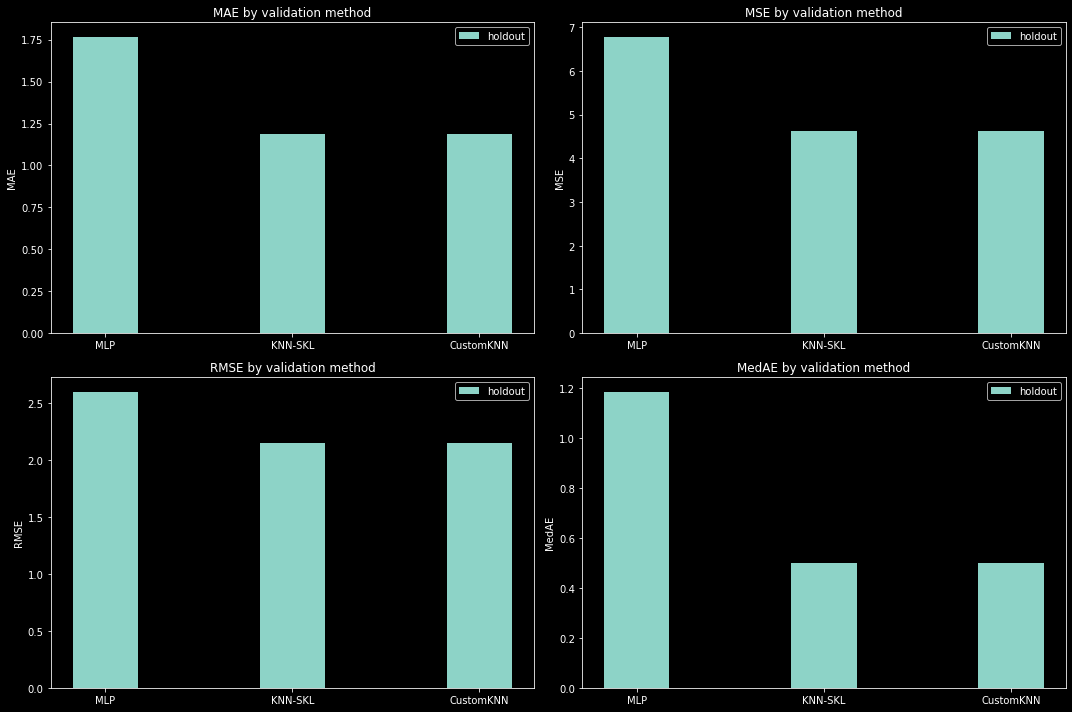

In [100]:
plt.style.use('dark_background')

labels = ['MLP', 'KNN-SKL', 'CustomKNN']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars



fig, ax = plt.subplots(2,2)
fig.set_size_inches(15, h=10)
for i in range(2):
    for j in range(2):
        
        metric_idx = 2 + i*2 + j
        metric_name = results_life_exp.columns[metric_idx]

         
        rects1 = ax[i,j].bar(x , results_life_exp.loc[results_life_exp['val'] == 'holdout', metric_name], width, label='holdout')
        #rects2 = ax[i,j].bar(x + width/2, results_life_exp.loc[results_life_exp['val'] == 'cv', metric_name], width, label='cv-2')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax[i,j].set_ylabel(metric_name)
        ax[i,j].set_title(f'{metric_name} by validation method')
        ax[i,j].set_xticks(x)
        ax[i,j].set_xticklabels(labels)
        ax[i,j].legend()

        fig.tight_layout()



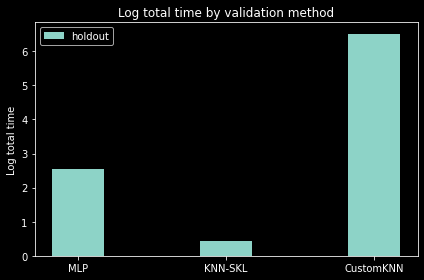

In [69]:
fig, ax = plt.subplots()
rects1 = ax.bar(x , np.log(1+ results_life_exp.loc[results_life_exp['val'] == 'holdout', 'total_time(sec)']), width, label='holdout')
# rects2 = ax.bar(x + width/2, np.log(1+ results_life_exp.loc[results_life_exp['val'] == 'cv', 'total_time(sec)']), width, label='cv-5')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Log total time')
ax.set_title(f'Log total time by validation method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()